<a href="https://colab.research.google.com/github/rahbarabbas/Major_Project/blob/main/face_mask_detection_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/major_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import cv2
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from scipy.spatial import distance
import numpy as np

In [ ]:
face_model = cv2.CascadeClassifier('/content/drive/MyDrive/major_project/cascade_model/haarcascade_frontalface_default.xml')

In [ ]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('../content/drive/MyDrive/major_project/dataset/images/maksssksksss710.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [ ]:
MIN_DISTANCE = 130

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")

In [ ]:
#Load train and test set
train_dir = '../content/drive/MyDrive/major_project/Face Mask Dataset/Train'
test_dir = '../content/drive/MyDrive/major_project/Face Mask Dataset/Test'
val_dir = '../content/drive/MyDrive/major_project/Face Mask Dataset/Validation'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(128,128),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [ ]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(128,128,3))

for layer in vgg19.layers:
    layer.trainable = False
    
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=len(train_generator)//32,
                              epochs=20,validation_data=val_generator,
                              validation_steps=len(val_generator)//32)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/20
9/9 [==============================] - 89s 9s/step - loss: 0.4492 - accuracy: 0.7743
Epoch 2/20
9/9 [==============================] - 82s 8s/step - loss: 0.2026 - accuracy: 0.9236
Epoch 3/20
9/9 [==============================] - 77s 8s/step - loss: 0.1473 - accuracy: 0.9549
Epoch 4/20
9/9 [==============================] - 78s 8s/step - loss: 0.1365 - accuracy: 0.9549
Epoch 5/20
9/9 [==============================] - 71s 7s/step - loss: 0.0995 - accuracy: 0.9792
Epoch 6/20
9/9 [==============================] - 70s 7s/step - loss: 0.1001 - accuracy: 0.9688
Epoch 7/20
9/9 [==============================] - 69s 7s/step - loss: 0.0783 - accuracy: 0.9653
Epoch 8/20
9/9 [==============================] - 72s 7s/step - loss: 0.1062 - accuracy: 0.9549
Epoch 9/20
9/9 [==============================] - 62s 7s/step - loss: 0.0785 - accuracy: 0.9816
Epoch 10/20
9/9 [==============================] - 70s 7s/step - loss: 0.0487 - accuracy: 0.9861
Epoch 11/20
9/9 [======================

In [ ]:
model.evaluate_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


[0.06133587658405304, 0.9800000190734863]

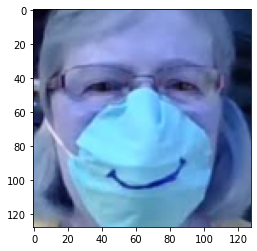

In [ ]:
sample_mask_img = cv2.imread('../content/drive/MyDrive/major_project/Face Mask Dataset/Test/WithMask/1174.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [ ]:
model.predict(sample_mask_img)

1/1 [==============================] - 0s 438ms/step


array([[0.7243037 , 0.34036285]], dtype=float32)

In [ ]:
model.save('/content/drive/MyDrive/major_project/model/masknet.h5')

In [ ]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 [==============================] - 0s 260ms/step


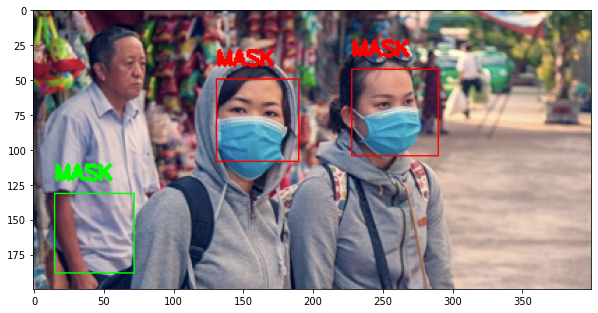

In [ ]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(128,128))
        crop = np.reshape(crop,[1,128,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)
            
else:
    print("No. of faces detected is less than 2")